In [2]:
from xbbg import blp
import pdblp
import workdays
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 70)
# https://data.bloomberglp.com/labs/sites/2/2013/12/blpapi-developers-guide-1.38.pdf
# https://data.bloomberglp.com/professional/sites/10/2017/03/BLPAPI-Core-Developer-Guide.pdf

In [17]:
LS = ["ES","NQ","TP","JGS","NZ","IFB","FFD","XU"]
T = [i + "1 Index" for i in LS]
    
d_from = workdays.workday(datetime.datetime.today(), days=-260*2).strftime("%Y%m%d")
d_to = workdays.workday(datetime.datetime.today(), days=-1).strftime("%Y%m%d")
df = blp.bdh(T, ["px_open","px_last","px_volume"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
# blp.bdh(T, ["px_open","px_last"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
# blp.bdh(T, ["px_open","px_last"], d_from, d_to, Per="M").reset_index()
df = df[[df.columns[0][0]]+T]
df.columns = ["Date"] + [ l + x for l in LS for x in ["_open","_last","_volume"]]
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,ES_open,ES_last,ES_volume,NQ_open,NQ_last,NQ_volume,TP_open,TP_last,TP_volume,JGS_open,JGS_last,JGS_volume,NZ_open,NZ_last,NZ_volume,IFB_open,IFB_last,IFB_volume,FFD_open,FFD_last,FFD_volume,XU_open,XU_last,XU_volume
0,2022-11-02,4204.04,4101.47,2210708.0,12479.65,12065.42,770983.0,1853.1,1851.7,56293.0,20829.92,20700.23,5285.0,20740.91,20649.59,115697.0,3548.00,3600.98,33444.0,5261.07,5320.39,24876.0,11383.9,11575.0,344705.0
1,2022-11-03,4099.29,4056.85,1887557.0,12058.25,11826.75,705050.0,1853.1,1851.7,56293.0,20583.11,20663.67,5630.0,20535.97,20617.79,156172.0,3579.47,3570.09,22746.0,5292.15,5320.03,18858.0,11565.2,11367.2,272288.0
2,2022-11-04,4052.77,4113.17,2494788.0,11809.11,12005.61,881129.0,1850.2,1828.2,82571.0,20713.94,20815.06,5628.0,20636.22,20703.36,120212.0,3569.70,3697.36,37859.0,5328.20,5450.74,30947.0,11373.1,11839.5,351546.0
3,2022-11-07,4081.07,4152.08,1483146.0,11891.24,12142.31,554692.0,1829.7,1852.1,58875.0,20927.61,20852.77,3904.0,20818.18,20783.19,171140.0,3665.69,3696.57,29193.0,5449.14,5447.01,23784.0,11841.5,11900.3,379858.0
4,2022-11-08,4149.35,4173.84,1878046.0,12144.24,12230.51,728868.0,1851.2,1873.6,51696.0,20948.75,20833.92,4706.0,20818.18,20783.19,171140.0,3701.66,3667.84,24401.0,5447.72,5440.62,18820.0,11901.3,11789.6,210405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2024-10-23,5887.25,5837.75,1468269.0,20521.00,20220.50,619162.0,2658.5,2636.5,38761.0,24570.00,24496.00,56602.0,24471.00,24482.65,209726.0,3965.20,3982.60,91964.0,5732.80,5764.80,66531.0,13580.0,13658.0,373043.0
516,2024-10-24,5844.00,5849.00,1159448.0,20294.25,20380.25,462552.0,2643.0,2634.5,44586.0,24459.50,24459.00,49311.0,24490.10,24452.00,153868.0,3963.00,3933.00,68994.0,5725.60,5704.40,53231.0,13647.0,13475.0,302297.0
517,2024-10-25,5853.25,5846.00,1368245.0,20388.50,20498.75,585929.0,2638.0,2626.5,39773.0,24445.00,24149.00,88258.0,24400.00,24192.75,282219.0,3945.00,3960.40,86994.0,5724.80,5791.40,62103.0,13481.0,13545.0,593140.0
518,2024-10-28,5857.00,5861.50,1017440.0,20525.50,20497.00,430120.0,2621.5,2662.0,46544.0,24373.00,24415.00,103043.0,24258.30,24348.45,261156.0,3960.40,3961.80,67380.0,5806.00,5849.80,50896.0,13545.0,13524.0,787414.0


In [14]:
def Plot(title="",c="" ,l="",axhline="",m="", ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.plot(df["Date"], df[c], label=l, marker=m)
    ax.set_title(title, fontsize=10)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    if l != "":
        ax.legend(loc='best')
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)
    plt.tight_layout()
    plt.show()
    
def Plot2(title,c1,c2,l1="",l2="",m1="",m2="",axhline="",color2='tab:orange'): #Two-axis graph  
    fig, ax = plt.subplots(figsize=(6.5, 2))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    ax.plot(df["Date"], df[c1], marker=m1, label=l1)
    ax.plot(df["Date"], df[c2], marker=m2, label=l2, color=color2)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title, fontsize=10)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def PlotTW(title,c1,c2,l1="",l2=""): #Two-axis graph
    fig, ax = plt.subplots(figsize=(6.5, 2.3))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    
    line1, = ax.plot(df["Date"], df[c1], label=l1)  # line1オブジェクトを取得
    ax.set_ylabel(l1)

    ax2 = ax.twinx()
    line2, = ax2.plot(df["Date"], df[c2], label=l2, color='lightsteelblue')  # line2オブジェクトを取得
    ax2.set_ylabel(l2)
    
    ax.set_title(title, fontsize=10)
    ax.legend(handles=[line1, line2], labels=[l1, l2], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.tight_layout()
    plt.show()

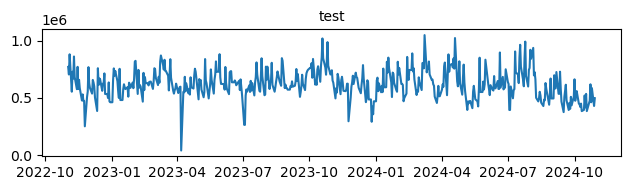

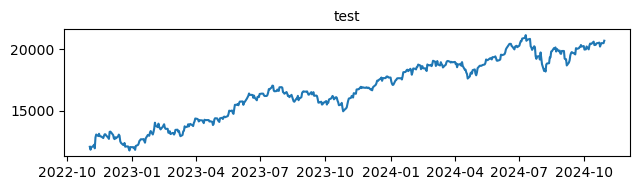

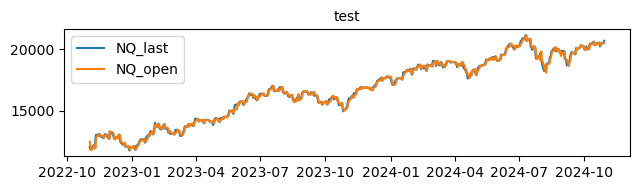

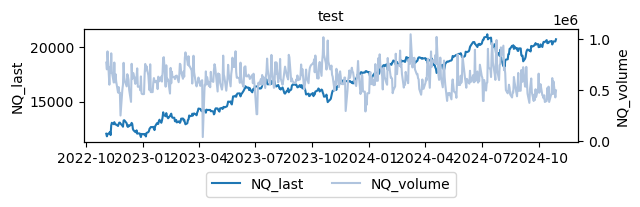

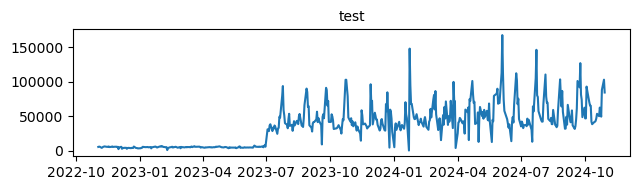

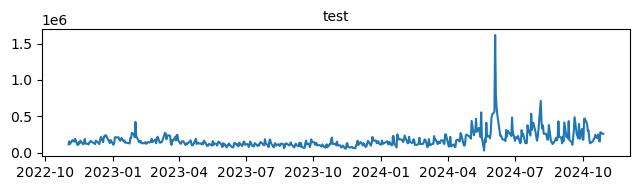

In [16]:
Plot("test","NQ_volume")
Plot("test","NQ_last")
Plot2("test","NQ_last","NQ_open")
PlotTW("test","NQ_last","NQ_volume")

Plot("test","JGS_volume")
Plot("test","NZ_volume")

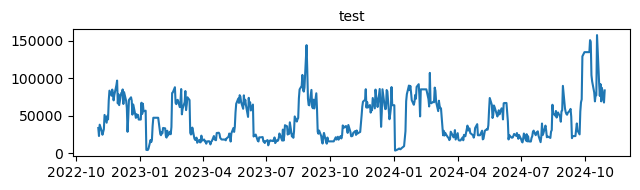

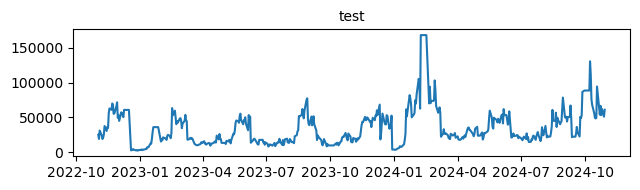

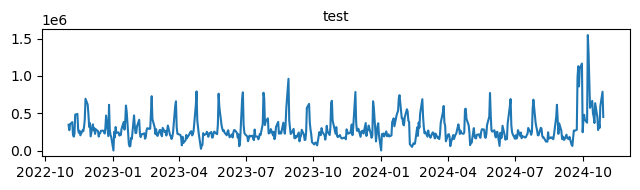

In [18]:
Plot("test","IFB_volume")
Plot("test","FFD_volume")
Plot("test","XU_volume")